# Using a Stochastic Gradient Descent Classifier to classify cell images of Malaria Cells and uninfected cells

segmented cells from the thin blood smear slide images from the Malaria Screener research activity. To reduce the burden for microscopists in resource-constrained regions and improve diagnostic accuracy, researchers at the Lister Hill National Center for Biomedical Communications (LHNCBC), part of National Library of Medicine (NLM), have developed a mobile application that runs on a standard Android smartphone attached to a conventional light microscope. Giemsa-stained thin blood smear slides from 150 P. falciparum-infected and 50 healthy patients were collected and photographed at Chittagong Medical College Hospital, Bangladesh. The smartphone’s built-in camera acquired images of slides for each microscopic field of view. The images were manually annotated by an expert slide reader at the Mahidol-Oxford Tropical Medicine Research Unit in Bangkok, Thailand. The de-identified images and annotations are archived at NLM (IRB#12972). We applied a level-set based algorithm to detect and segment the red blood cells. The dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells. An instance of how the patient-ID is encoded into the cell name is shown herewith: “P1” denotes the patient-ID for the cell labeled “C33P1thinF_IMG_20150619_114756a_cell_179.png”. We have also included the CSV files containing the Patient-ID to cell mappings for the parasitized and uninfected classes. The CSV file for the parasitized class contains 151 patient-ID entries. The slide images for the parasitized patient-ID “C47P8thinOriginal” are read from two different microscope models (Olympus and Motif). The CSV file for the uninfected class contains 201 entries since the normal cells from the infected patients’ slides also make it to the normal cell category (151+50 = 201).
https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [1]:
import numpy as np
import pandas as pd 
import os
print (os.listdir(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria'))

['.ipynb_checkpoints', 'cell_images']


In [2]:
parasitized_data = os.listdir(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Parasitized')
uninfected_data = os.listdir(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Uninfected')

In [3]:
import skimage as sk
from PIL import Image

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
print(parasitized_data[:10]) #Output in the Parasitized Data
print('\n')
print(uninfected_data[:10])#Output in uninfected Data

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


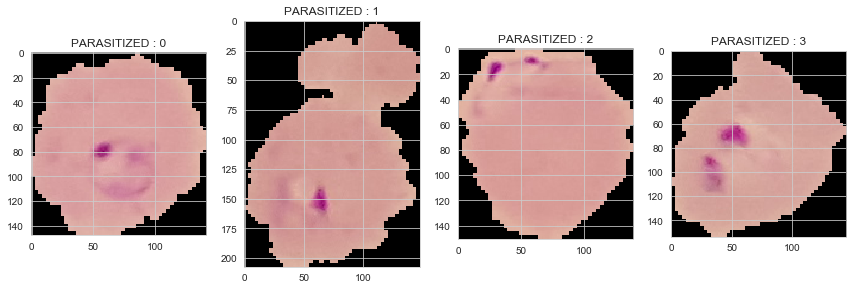

In [6]:
plt.figure(figsize = (12,12))
for i in range(4): 
    plt.subplot(1, 4, i+1) #create for subplots containing:
    img = plt.imread(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : '+ str(i))
    plt.tight_layout()
plt.show()

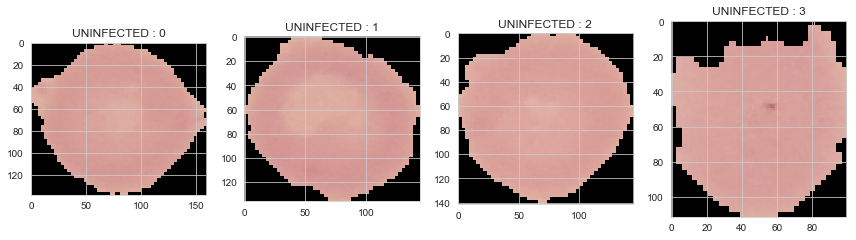

In [7]:
plt.figure(figsize = (12,12))
for i in range(4): 
    plt.subplot(1, 4, i+1) #create for subplots containing:
    img = plt.imread(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : '+ str(i))
    plt.tight_layout()
plt.show()

In [8]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [9]:
#Code inspired by and a modification of Harshal Shinde's on Kaggle. His code is what I used to learn Image Processing in Python, please check out his work at
# https://www.kaggle.com/harshel7
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Parasitized' + "/" + img)
        img_resized = resize(img_read,(50,50))
        img_array = np.array(img_resized)
        data.append(img_array)
        labels.append(1)
    except:
        None
for img in uninfected_data:
    try:
        img_read = plt.imread(r'C:\Users\shahj\Desktop\Coursework\Malaria\cellimagesfordetectingmalaria\cell_images\Uninfected' + "/" + img)
        img_resized = resize(img_read,(50,50))
        img_array = np.array(img_resized)
        data.append(img_array)
        labels.append(0)
    except:
        None

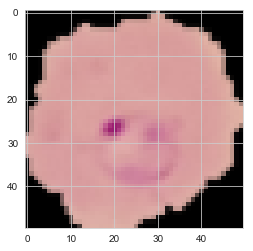

In [10]:
plt.imshow(data[0])
plt.show()

In [11]:
#Thus we have two lists, one containing the image information and one containing the labels

In [12]:
image_data = np.array(data)
labels = np.array(labels)

In [13]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=101)

In [16]:
print(f'SHAPE OF TRAINING IMAGE DATA : {X_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {X_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046,)
SHAPE OF TESTING LABELS : (5512,)


In [17]:
#from keras.utils import np_utils

In [18]:
#y_train = np_utils.to_categorical(y_train, num_classes = 2)
#y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [19]:
print(f'SHAPE OF TRAINING IMAGE DATA : {X_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {X_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046,)
SHAPE OF TESTING LABELS : (5512,)


In [20]:
X_train = X_train.reshape(22046, 7500)


In [21]:
X_test = X_test.reshape(5512, 7500)

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
#Implementing Cross validation

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [26]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.6532861613825011
0.59559123690298
0.6649428415895482


In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=10,scoring='accuracy')

array([0.65895692, 0.60181406, 0.67528345, 0.64399093, 0.66621315,
       0.60680272, 0.65759637, 0.661678  , 0.68361325, 0.61370858])

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

[[5535 5493]
 [2489 8529]]


              precision    recall  f1-score   support

           0       0.69      0.50      0.58     11028
           1       0.61      0.77      0.68     11018

    accuracy                           0.64     22046
   macro avg       0.65      0.64      0.63     22046
weighted avg       0.65      0.64      0.63     22046



Well, its not where I would have liked to be honestly. The main goal, was to familiarize myself with image data and image classification, to that end this project was definitely a success. In no small part thanks to Harshel7 over at Kaggle and Aurelien Geron's Textbook. Would highly recommend both. I think the next step will be to put in more effort into teaching myself CNN with Keras.